### Imports:

In [1]:
import pandas as pd  # Pandas is used for data manipulation and analysis, especially with tabular data.
import numpy as np  # NumPy provides support for large, multi-dimensional arrays and mathematical functions.
import matplotlib.pyplot as plt  # Matplotlib is used for creating static, animated, and interactive visualizations.
import seaborn as sns  # Seaborn is a statistical data visualization library built on top of matplotlib.
import scipy.stats as stats  # SciPy's stats module offers statistical functions and probability distributions.
import statsmodels.api as sm  # Statsmodels is used for estimating and interpreting statistical models.
from sklearn.linear_model import LinearRegression  # LinearRegression from scikit-learn is used to perform linear regression modeling.
from sklearn.model_selection import train_test_split  # train_test_split is used to split data into training and testing sets for model validation.

About the Data:

1. longitude: A measure of how far west a house is; a higher value is farther west
2. latitude: A measure of how far north a house is; a higher value is farther north
3. housingMedianAge: Median age of a house within a block; a lower number is a newer building
4. totalRooms: Total number of rooms within a block
5. totalBedrooms: Total number of bedrooms within a block
6. population: Total number of people residing within a block

In [2]:
data = pd.read_csv('https://raw.githubusercontent.com/Nachoxt17/Real-Estate-Linear-Regression-Predictive-Analytics-for-California/main/data/california_housing_data.csv')
print(data.shape)
data.head(10)

(20640, 10)


,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY
5,-122.25,37.85,52.0,919.0,213.0,413.0,193.0,4.0368,269700.0,NEAR BAY
6,-122.25,37.84,52.0,2535.0,489.0,1094.0,514.0,3.6591,299200.0,NEAR BAY
7,-122.25,37.84,52.0,3104.0,687.0,1157.0,647.0,3.1200,241400.0,NEAR BAY
8,-122.26,37.84,42.0,2555.0,665.0,1206.0,595.0,2.0804,226700.0,NEAR BAY
9,-122.25,37.84,52.0,3549.0,707.0,1551.0,714.0,3.6912,261100.0,NEAR BAY


# 1. Data Cleaning:

## 1-A. Exploring the DataFrame:

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  float64
 3   total_rooms         20640 non-null  float64
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  float64
 6   households          20640 non-null  float64
 7   median_income       20640 non-null  float64
 8   median_house_value  20640 non-null  float64
 9   ocean_proximity     20640 non-null  object 
dtypes: float64(9), object(1)
memory usage: 1.6+ MB


In [4]:
data["ocean_proximity"].unique()

array(['NEAR BAY', '<1H OCEAN', 'INLAND', 'NEAR OCEAN', 'ISLAND'],
      dtype=object)

## 1-B. Mising Data Inspection:

In [5]:
# Check for mising values:
missing_values = data.isnull().sum()

# Calculate the percentage of missing data in each column:
missing_percentage = (missing_values / len(data)) * 100

# Display the missing data statistics:
print("Missing Values in Each Column:\n", missing_values)
print("\nPercentage of Missing Data:\n", missing_percentage)

Missing Values in Each Column:
 longitude               0
latitude                0
housing_median_age      0
total_rooms             0
total_bedrooms        207
population              0
households              0
median_income           0
median_house_value      0
ocean_proximity         0
dtype: int64

Percentage of Missing Data:
 longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        1.002907
population            0.000000
households            0.000000
median_income         0.000000
median_house_value    0.000000
ocean_proximity       0.000000
dtype: float64


In [6]:
# Since less than 1% of the Total Data of one of the Features is Missing and the DataSet is Large;
# we remove those rows with Missing Values:
data_cleaned = data.dropna()

# Verify that Missing Values have been removed:
print("\nMissing values in each column after removal:")
print(data_cleaned.isnull().sum())


Missing values in each column after removal:
longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
median_house_value    0
ocean_proximity       0
dtype: int64


# 2. Data Exploration and Visualization:

In [7]:
data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


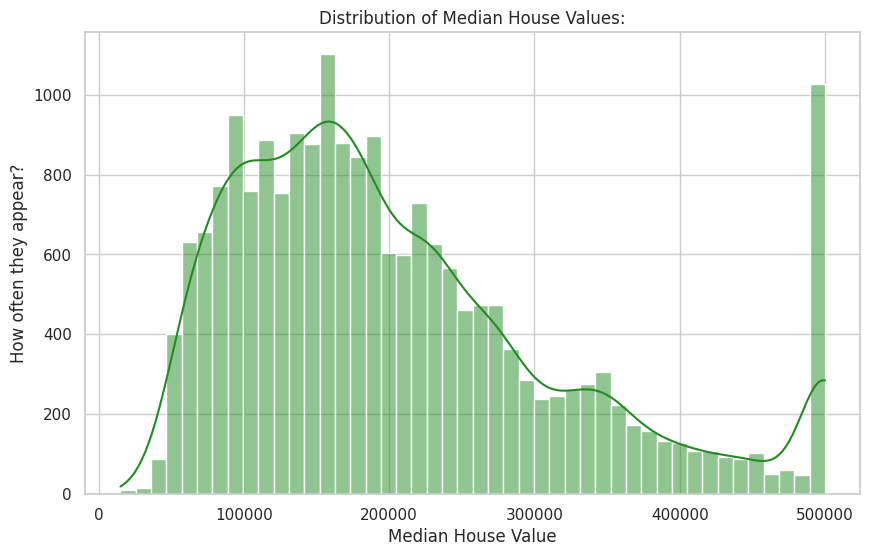

In [8]:
sns.set(style="whitegrid")
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['median_house_value'], color='forestgreen', kde=True)
plt.title('Distribution of Median House Values:')
plt.xlabel('Median House Value')
plt.ylabel('How often they appear?')
plt.show()

# 3. Removing outliers to make a more precise analysis:

## 3-A. Removing outliers using InterQualtile Ranges:

In [9]:
# Assuming 'data' is your DataFrame and 'median_house_value' is the column of interest, we remove the Bottom 25% and the Top 25% of
# the 'median_house_value' Data:
Q1 = data_cleaned['median_house_value'].quantile(0.25)
print("Q1: ", Q1)
Q3 = data_cleaned['median_house_value'].quantile(0.75)
print("Q3: ", Q3)
IQR = Q3 - Q1 # IQR = The 2nd and 3rd Quarters of the 'median_house_value' Data, combined.

# Define the limits for the outliers:
IQ_lower_limit = Q1 - (1.5 * IQR)
print("lower_limit: ", IQ_lower_limit)
IQ_upper_limit = Q3 + (1.5 * IQR)
print("upper_limit: ", IQ_upper_limit)

# Remove outliers:
data_no_outliers_1 = data_cleaned[(data_cleaned['median_house_value'] >= IQ_lower_limit) & (data_cleaned['median_house_value'] <= IQ_upper_limit)]

# Check the shape of the data before and after removal of outliers:
print("Original data shape:", data_cleaned.shape)
print("New data shape without outliers:", data_no_outliers_1.shape)

Q1:  119500.0
Q3:  264700.0
lower_limit:  -98300.0
upper_limit:  482500.0
Original data shape: (20433, 10)
New data shape without outliers: (19369, 10)


## 3-B. Removing outliers using BoxPlots:

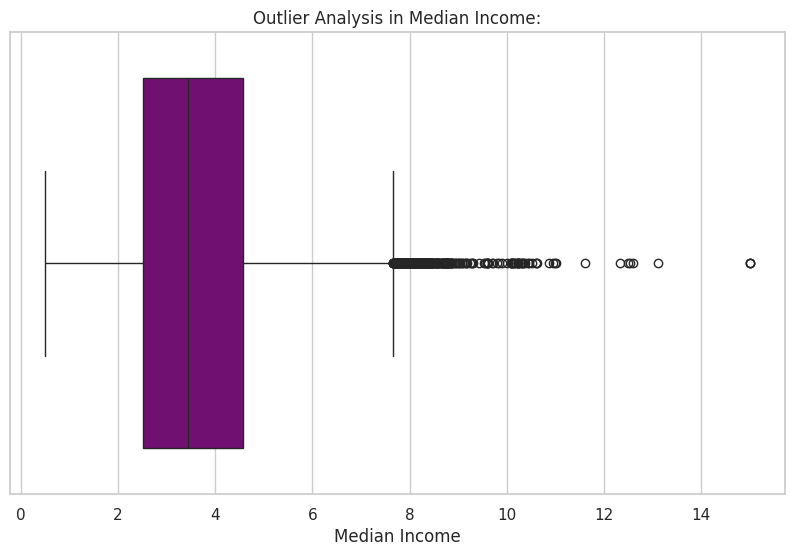

In [10]:
plt.figure(figsize=(10, 6))
sns.boxplot(x=data_no_outliers_1['median_income'], color='purple')
plt.title('Outlier Analysis in Median Income:')
plt.xlabel('Median Income')
plt.show()

In [11]:
# We remove (Again) the Bottom 25% and the Top 25% of the 'median_house_value' Data which outliers were removed before
# with InterQualtile Ranges:
Q1 = data_no_outliers_1['median_income'].quantile(0.25)
Q3 = data_no_outliers_1['median_income'].quantile(0.75)
IQR = Q3 - Q1

# Define the limits for the outliers:
BP_lower_limit = Q1 - 1.5 * IQR
BP_upper_limit = Q3 + 1.5 * IQR

# Remove outliers
data_no_outliers_2 = data_no_outliers_1[(data_no_outliers_1['median_income'] >= BP_lower_limit) & (data_no_outliers_1['median_income'] <= BP_upper_limit)]

# Check the shape of the data before and after the removal of outliers
print("Original data shape:", data_no_outliers_1.shape)
print("Data shape without outliers:", data_no_outliers_2.shape)

Original data shape: (19369, 10)
Data shape without outliers: (19026, 10)


In [12]:
data = data_no_outliers_2

## 3-C. Correlation HeatMap:

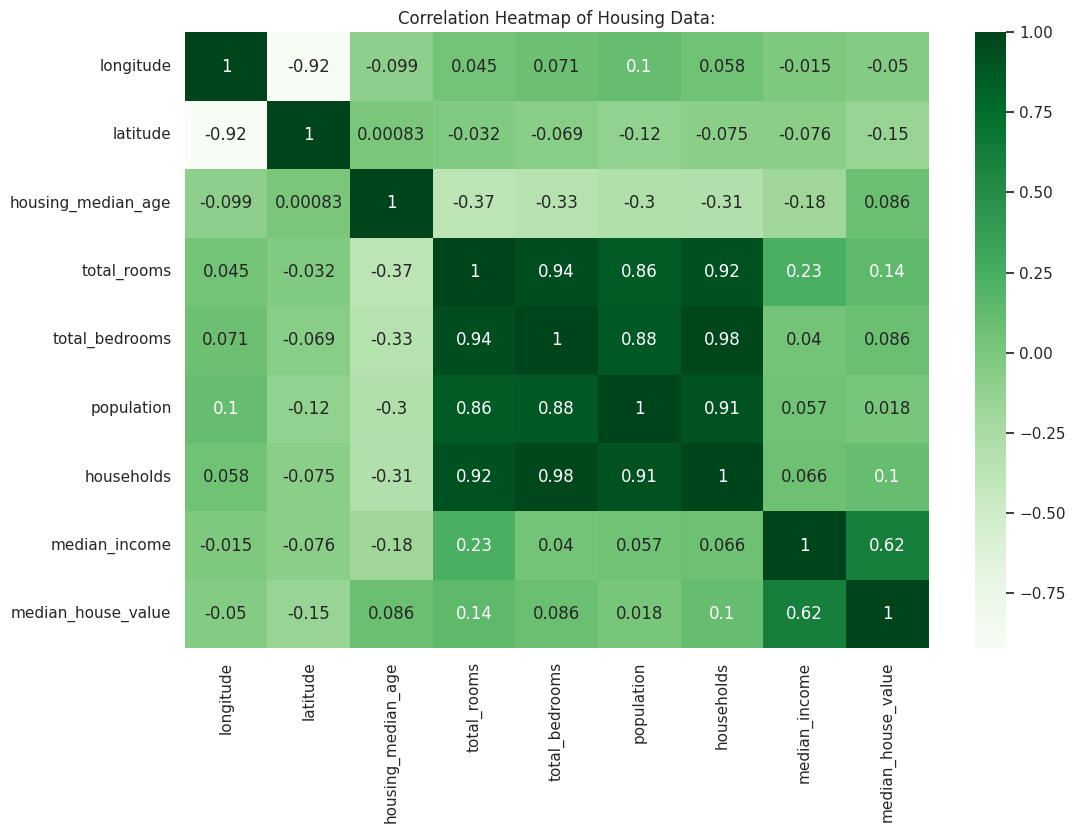

In [13]:
# (Only select numeric columns):
numeric_data = data.select_dtypes(include=['number'])

# Now plot the Correlation HeatMap with Numerical Values *ONLY*:
plt.figure(figsize=(12, 8))
sns.heatmap(numeric_data.corr(), annot=True, cmap='Greens')
plt.title('Correlation Heatmap of Housing Data:')
plt.show()

### In order to achieve for the Variables to be the most Independent from each other as possible; and thus create the most accuarate Predictive Analysis as possible, we graphically evaluate the Independence of each Variable, and decided that is prudent to Delete the `total_bedrooms` Variable since it has a very big Correlation[0.98] with `households`(Thus it almost works as a "double" Variable), but of the 2 the `total_bedrooms` Variable has the lowest Correlation[0.086] with the Target(Dependent) variable to Predict that is `median_house_value`.

In [14]:
# We drop the "total_bedrooms" Variable:
data = data.drop("total_bedrooms", axis = 1)
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity'],
      dtype='object')

In [15]:
# Unique value count for categorical data:
for column in ['ocean_proximity']:  # Add other categorical columns if any
    print(f"Unique values in {column}:", data[column].unique())

Unique values in ocean_proximity: ['NEAR BAY' '<1H OCEAN' 'INLAND' 'NEAR OCEAN' 'ISLAND']


# 4. String Data Categorization to Dummy Variables:

In [16]:
ocean_proximity_dummies = pd.get_dummies(data['ocean_proximity'], prefix='ocean_proximity', dtype=int)
data = pd.concat([data.drop("ocean_proximity", axis =1), ocean_proximity_dummies], axis=1)
ocean_proximity_dummies.head(10)

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
5,0,0,0,1,0
6,0,0,0,1,0
7,0,0,0,1,0
8,0,0,0,1,0
9,0,0,0,1,0
10,0,0,0,1,0
11,0,0,0,1,0


In [17]:
print(data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_ISLAND', 'ocean_proximity_NEAR BAY',
       'ocean_proximity_NEAR OCEAN'],
      dtype='object')


### In order to transform the Categorial Data of the Column `ocean_proximity` that contains String Variables into workable Data for the M.L. Algorithm, we transform it into Numeric Data; each Variable is turned into a Column that contains only one out of 2 Boolean Conditions (1 or 0) to indicate if the Row counts with that Feature or not. And we delete the Column `ocean_proximity`.

In [18]:
# We remove the 'ocean_proximity_ISLAND' Variable:
data = data.drop("ocean_proximity_ISLAND", axis = 1)
print(data.columns)

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income', 'median_house_value',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')


In [19]:
data.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
2,-122.24,37.85,52.0,1467.0,496.0,177.0,7.2574,352100.0,0,0,1,0
3,-122.25,37.85,52.0,1274.0,558.0,219.0,5.6431,341300.0,0,0,1,0
4,-122.25,37.85,52.0,1627.0,565.0,259.0,3.8462,342200.0,0,0,1,0
5,-122.25,37.85,52.0,919.0,413.0,193.0,4.0368,269700.0,0,0,1,0
6,-122.25,37.84,52.0,2535.0,1094.0,514.0,3.6591,299200.0,0,0,1,0
7,-122.25,37.84,52.0,3104.0,1157.0,647.0,3.1200,241400.0,0,0,1,0
8,-122.26,37.84,42.0,2555.0,1206.0,595.0,2.0804,226700.0,0,0,1,0
9,-122.25,37.84,52.0,3549.0,1551.0,714.0,3.6912,261100.0,0,0,1,0
10,-122.26,37.85,52.0,2202.0,910.0,402.0,3.2031,281500.0,0,0,1,0
11,-122.26,37.85,52.0,3503.0,1504.0,734.0,3.2705,241800.0,0,0,1,0


# 5. Splitting the Data into Train/Test:

In [20]:
# Define your features (independent variables) and target (dependent variable):
features = ['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'population', 'households', 'median_income',
       'ocean_proximity_<1H OCEAN', 'ocean_proximity_INLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN']
target = ["median_house_value"]

X = data[features]
y = data[target]


# Split the data into a training set and a testing set
# test_size specifies the proportion of the data to be included in the test split
# random_state ensures reproducibility of your split:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1111) #("1111" is just a randomly choosed number).

# Check the size of the splits:
print(f'Training set size: {X_train.shape[0]} samples')
print(f'Test set size: {X_test.shape[0]} samples')

Training set size: 15220 samples
Test set size: 3806 samples


# 6. Training:

In [21]:
X_train.head(10)

,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
13508,-117.33,34.13,18.0,3009.0,2317.0,659.0,1.6375,0,1,0,0
4564,-118.26,34.07,52.0,1802.0,2382.0,587.0,1.8438,1,0,0,0
5607,-118.30,33.79,21.0,1068.0,1180.0,274.0,2.5000,1,0,0,0
17518,-121.91,37.34,35.0,2189.0,1193.0,562.0,2.8042,1,0,0,0
14183,-117.07,32.71,39.0,2754.0,2263.0,619.0,2.2454,0,0,0,1


In [22]:
# Adding a constant to the predictors because statsmodels' OLS doesn't include it by default:
X_train_const = sm.add_constant(X_train)
X_train_const
X_train_const.head(10)

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
15578,1.0,-116.90,33.03,11.0,3213.0,1975.0,579.0,3.4750,1,0,0,0
1656,1.0,-121.93,37.89,13.0,2085.0,852.0,264.0,7.3445,0,1,0,0
9190,1.0,-118.35,34.32,52.0,102.0,54.0,32.0,1.9875,1,0,0,0
11839,1.0,-120.95,39.93,26.0,2023.0,922.0,365.0,2.8125,0,1,0,0
12267,1.0,-116.91,33.75,13.0,10886.0,4266.0,1955.0,2.3169,0,1,0,0
13508,1.0,-117.33,34.13,18.0,3009.0,2317.0,659.0,1.6375,0,1,0,0
4564,1.0,-118.26,34.07,52.0,1802.0,2382.0,587.0,1.8438,1,0,0,0
5607,1.0,-118.30,33.79,21.0,1068.0,1180.0,274.0,2.5000,1,0,0,0
17518,1.0,-121.91,37.34,35.0,2189.0,1193.0,562.0,2.8042,1,0,0,0
14183,1.0,-117.07,32.71,39.0,2754.0,2263.0,619.0,2.2454,0,0,0,1


In [23]:
print(X_train_const.dtypes)
print(y_train.dtypes)

const                         float64
longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
population                    float64
households                    float64
median_income                 float64
ocean_proximity_<1H OCEAN       int64
ocean_proximity_INLAND          int64
ocean_proximity_NEAR BAY        int64
ocean_proximity_NEAR OCEAN      int64
dtype: object
median_house_value    float64
dtype: object


In [24]:
# Fit the OLS model:
model_fitted = sm.OLS(y_train, X_train_const).fit()

# Printing Summary:
print(model_fitted.summary())

                            OLS Regression Results                            
Dep. Variable:     median_house_value   R-squared:                       0.588
Model:                            OLS   Adj. R-squared:                  0.588
Method:                 Least Squares   F-statistic:                     1973.
Date:                Tue, 27 May 2025   Prob (F-statistic):               0.00
Time:                        18:50:31   Log-Likelihood:            -1.8879e+05
No. Observations:               15220   AIC:                         3.776e+05
Df Residuals:                   15208   BIC:                         3.777e+05
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

| **Metric**             | **Value** | **Indicates**                                                              | **Ideal Direction**     |
| ---------------------- | --------- | -------------------------------------------------------------------------- | ----------------------- |
| **R-squared**          | 0.588     | Proportion of variance in the dependent variable explained by the model.   | Closer to 1             |
| **Adjusted R-squared** | 0.588     | R-squared adjusted for the number of predictors; helps detect overfitting. | Closer to 1             |
| **F-statistic**        | 1973      | Tests if the overall regression model is a good fit.                       | Higher is better        |
| **Prob (F-statistic)** | 0.00      | P-value for the F-test; assesses model significance.                       | Closer to 0             |
| **Log-Likelihood**     | -188,790  | Measure of model fit; used for comparison between models.                  | Less negative is better |
| **AIC**                | 377,600   | Penalized model fit measure; lower balances better fit and simplicity.     | Lower is better         |
| **BIC**                | 377,700   | Like AIC but with heavier penalty for complexity.                          | Lower is better         |


# 7. Prediction/Testing:

In [25]:
# Adding a constant to the test predictors:
X_test_const = sm.add_constant(X_test)

# Making predictions on the test set:
test_predictions = model_fitted.predict(X_test_const)
test_predictions

,0
7322,153414.201880
465,239312.044180
12768,70054.781175
2617,189568.171319
13351,184267.795032
...,...
11691,171568.742378
1454,215893.783794
7360,129935.765388
19118,232846.312809


In [26]:
X_test_const.head(10)

,const,longitude,latitude,housing_median_age,total_rooms,population,households,median_income,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
7322,1.0,-118.17,33.98,27.0,1871.0,2542.0,581.0,2.8427,1,0,0,0
465,1.0,-122.28,37.86,52.0,938.0,393.0,189.0,3.8594,0,0,1,0
12768,1.0,-121.43,38.61,40.0,1134.0,675.0,249.0,1.3696,0,1,0,0
2617,1.0,-124.11,40.93,25.0,2392.0,1298.0,461.0,3.5076,0,0,0,1
13351,1.0,-117.62,34.02,9.0,4265.0,2280.0,589.0,5.5632,0,1,0,0
2798,1.0,-117.69,36.13,25.0,1709.0,632.0,292.0,1.7868,0,1,0,0
4177,1.0,-118.23,34.10,41.0,1353.0,1536.0,416.0,2.1687,1,0,0,0
12218,1.0,-117.23,33.57,6.0,13724.0,5860.0,1986.0,3.9617,1,0,0,0
4429,1.0,-118.22,34.08,31.0,394.0,573.0,131.0,1.8173,1,0,0,0
14793,1.0,-117.12,32.57,35.0,1450.0,930.0,286.0,2.6715,0,0,0,1


# 8. Checking OLS Assumtions:

## Assumtion 1: Linearity.

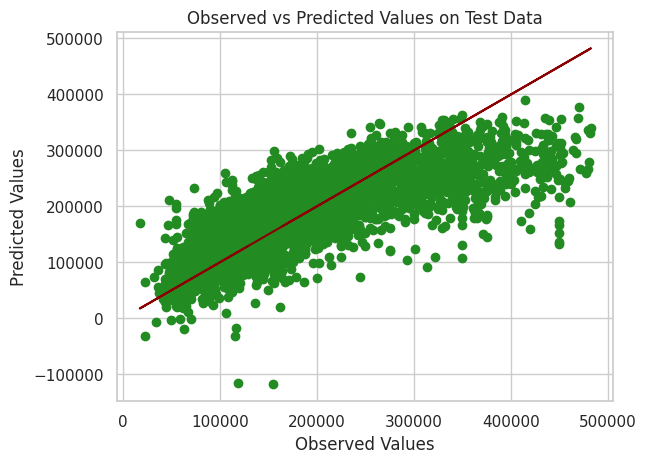

In [27]:
# Scatter plot for observed vs predicted values on test data:
plt.scatter(y_test, test_predictions, color = "forestgreen")
plt.xlabel('Observed Values')
plt.ylabel('Predicted Values')
plt.title('Observed vs Predicted Values on Test Data')
plt.plot(y_test, y_test, color='darkred')  # line for perfect prediction (true values).
plt.show()

**Positive Linear Relationship:**
The red line (which represents a perfect prediction line) and the distribution of the data points suggest there's a positive linear relationship between the observed and predicted values. This means that as the actual values increase, the predicted values also increase, which is a good sign for linearity.

## Assumtion 2: Random Sample.

In [28]:
# Calculate the mean of the residuals:
mean_residuals = np.mean(model_fitted.resid)

print(f"The mean of the residuals is {np.round(mean_residuals,2)}")

The mean of the residuals is 0.0


While we cannot directly observe the true errors in the model, we can work with the residuals, which are the differences between the observed values and the predicted values from the model. If the model is well-fitted, the residuals should be randomly scattered around zero without any systematic patterns.

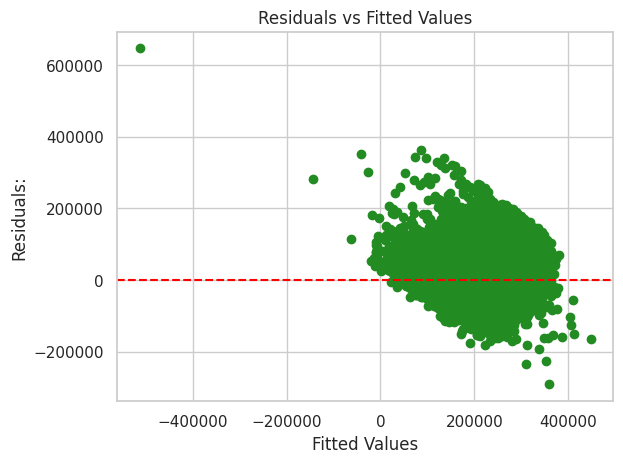

In [29]:
# Plotting the residuals:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals:')
plt.title('Residuals vs Fitted Values')
plt.show()

In this plot, we don't see any discernible patterns. The residuals are thus randomly distributed around the horizontal line at zero, with no clear shape or trend. If there's a pattern, or if the residuals show a systematic deviation from zero, it could suggest issues such as model misspecification, non-linearity, or omitted variable bias.

## Assumtion 3: Exogeneity.

In [30]:
# Calculate the residuals:
residuals = model_fitted.resid

# Check for correlation between residuals and each predictor:
for column in X_train.columns:
    corr_coefficient = np.corrcoef(X_train[column], residuals)[0, 1]
    print(f'Correlation between residuals and {column}: {np.round(corr_coefficient,2)}')

Correlation between residuals and longitude: 0.0
Correlation between residuals and latitude: 0.0
Correlation between residuals and housing_median_age: -0.0
Correlation between residuals and total_rooms: 0.0
Correlation between residuals and population: 0.0
Correlation between residuals and households: 0.0
Correlation between residuals and median_income: 0.0
Correlation between residuals and ocean_proximity_<1H OCEAN: -0.0
Correlation between residuals and ocean_proximity_INLAND: 0.0
Correlation between residuals and ocean_proximity_NEAR BAY: -0.0
Correlation between residuals and ocean_proximity_NEAR OCEAN: -0.0


**Durbin-Wu-Hausman Test:**
For a more formal statistical test, use the **Durbin-Wu-Hausman** test. This involves comparing your model with one that includes an instrumental variable. This test checks whether the coefficients of the model change significantly when the potentially endogenous variables are instrumented. This test is a more advanced, econometrical approach and requires identification of suitable instruments, which is not always straightforward.

## Assumtion 4: Homoskedasticty.

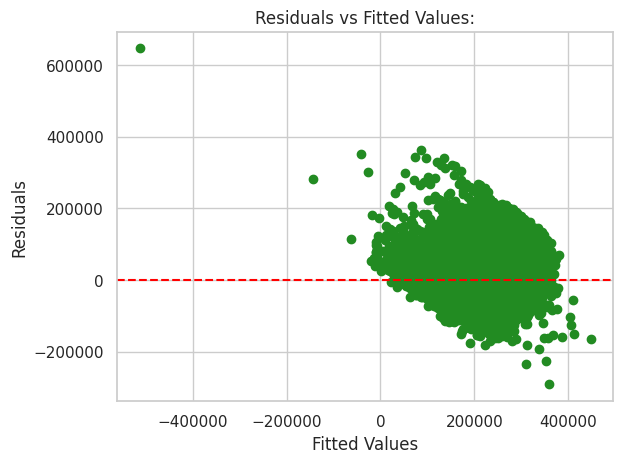

In [31]:
# Plotting the residuals:
plt.scatter(model_fitted.fittedvalues, model_fitted.resid, color = "forestgreen")
plt.axhline(y=0, color='red', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted Values:')
plt.show()

**Random Scatter:** If plot shows a random scatter of residuals around the horizontal line at zero, it supports the homoscedasticity assumption.

**Pattern or Shape:** If residuals display a pattern (such as a curve) or form a funnel shape where the spread increases with fitted values, this would suggest heteroscedasticity, meaning variance of residuals changes with the level of the independent variables.

# 9. Train/Test/Evaluation with Scikit-learn:

## 9-1. Scaling the Data:

In [35]:
from sklearn.preprocessing import StandardScaler
# Initialize the StandardScaler:
scaler = StandardScaler()

# Fit the scaler on the training data and transform it:
X_train_scaled = scaler.fit_transform(X_train)

# Apply the same transformation to the test data:
X_test_scaled = scaler.transform(X_test)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from math import sqrt

# Create and fit the model:
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Make predictions on the scaled test data:
y_pred = lr.predict(X_test_scaled)

# Calculate MSE and RMSE:
mse = mean_squared_error(y_test, y_pred)
rmse = sqrt(mse)

# Output the performance metrics:
print(f'RMSE on Test Set: {rmse}')

RMSE on Test Set: 59405.88869441674


In [34]:
print(y_pred)
y_test

[[153414.2018804 ]
 [239312.04418031]
 [ 70054.78117497]
 ...
 [129935.7653883 ]
 [232846.31280863]
 [207120.21348536]]


,median_house_value
7322,164400.0
465,196400.0
12768,65200.0
2617,73600.0
13351,195100.0
...,...
11691,217000.0
1454,229200.0
7360,142000.0
19118,200600.0
